FOLLOW THESE STEPS TO RUN THIS WORKBOOK
Run all cells by choosing the commands at the top of this workbook as shown in the picture:
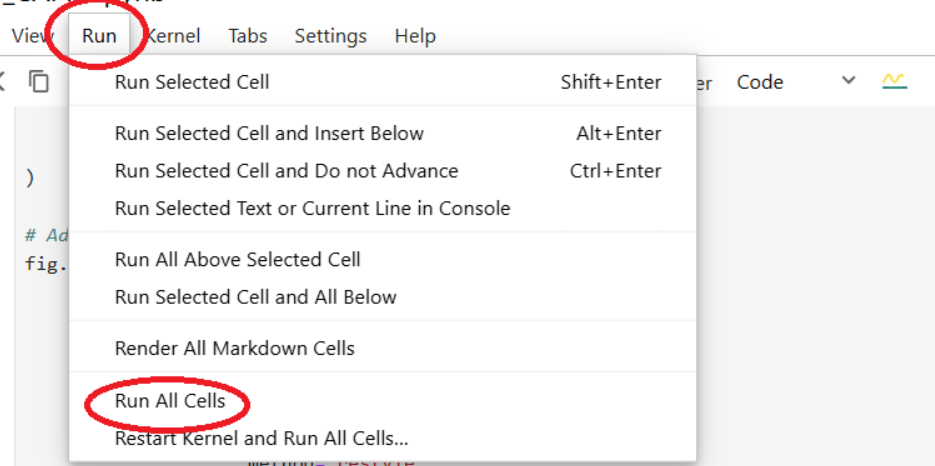




The following model called Prophet was developed by Meta.

Prophet is an excellent model for business forecasts.  It is a machine learning additive regression model. Prophet has backtesting already built into the model; whereby, the model will take part of the historical data and determine how well it predicted the next period in order to train the model.  Backtesting as well as training a model is normally a cumbersome process without using this built in feature that Meta has created.
The code for Prophet can be found by a general search on Github.com.

The data is Johnson & Johnson company sales revenue in millions generated from Google Gemini on 9/24/2025.
The graphs that follow are the sales figures that are partially historical and partially forecast through a future forecast.  There is a yhat component, trend component and yearly seasonality component.  Unfortunately where there a downward sloping trends the yearly seasonality will fall below zero.  This is a shortcoming of the model.

INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18cl7___/4k8v4gen.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18cl7___/hqduplkt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12823', 'data', 'file=/tmp/tmp18cl7___/4k8v4gen.json', 'init=/tmp/tmp18cl7___/hqduplkt.json', 'output', 'file=/tmp/tmp18cl7___/prophet_model6ez1gnd8/prophet_model-20251023080421.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:04:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


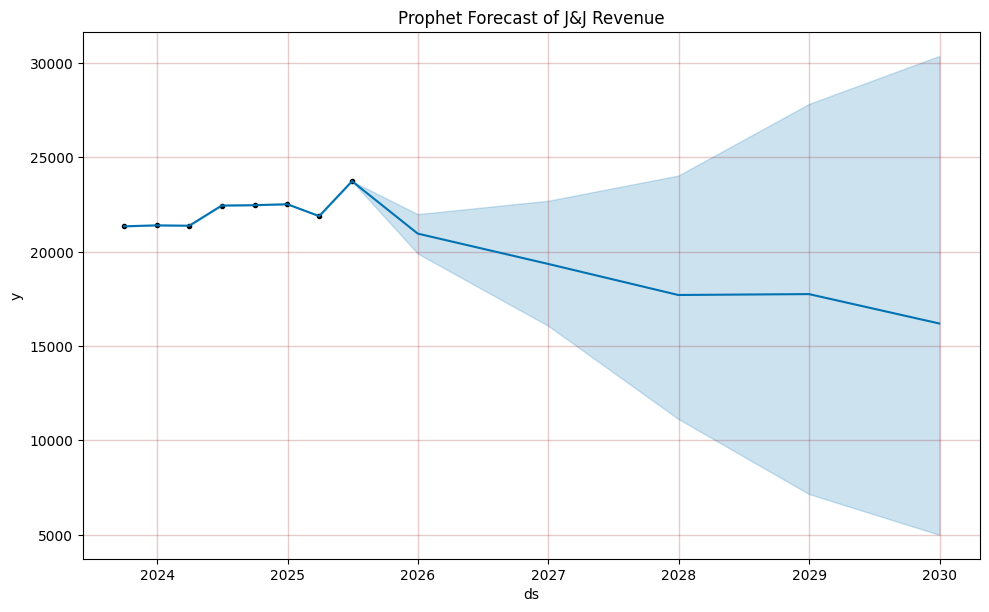

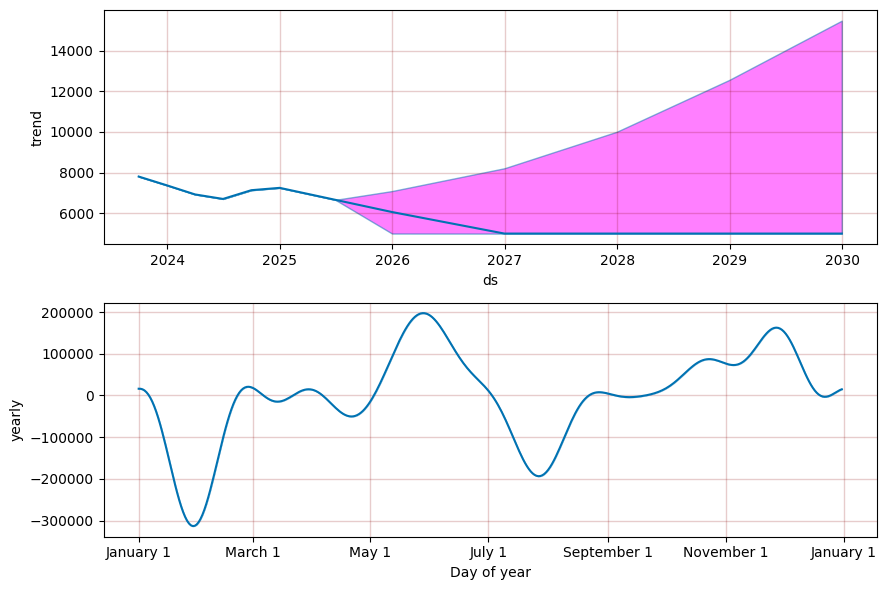

In [77]:
# --- Install necessary dependencies for Prophet and Excel loading ---
# 'openpyxl' is needed for pandas to read .xlsx files from a URL.
# 'prophet' and its dependencies are essential.
!pip install --quiet pandas matplotlib prophet openpyxl

# --- Imports ---
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

# --- Load dataset directly from URL ---
url = "https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Johnson&Johnson.xlsx"
# pandas can read the Excel file directly using the URL
df = pd.read_excel(url, sheet_name="Sheet1")

# --- Prepare data for Prophet ---
# 1. Rename columns: Prophet requires 'ds' (datestamp) and 'y' (value).
df = df.rename(columns={"Year": "ds", "Revenue": "y"})

# 2. Convert 'Year' (ds column) to a complete datetime object.
# We assume the yearly revenue data corresponds to the end of the year (December 31st).
# df["ds"] = pd.to_datetime(df["ds"].astype(str) + "-12-31") # This line caused the error

# The 'ds' column is already in datetime format, so no conversion is needed.

# --- Initialize and Train model ---
# Set yearly_seasonality=True as the data is yearly
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

# Fit the model to the prepared data
model.fit(df)

# --- Create future dataframe and forecast ---
# Forecast 5 periods (years) into the future using the 'Y' (Yearly) frequency
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

# After generating the forecast, set any predicted values (yhat) and the lower bound
# of the confidence interval (yhat_lower) below 5000 to 5000
forecast['yhat'] = forecast['yhat'].clip(lower=5000)
forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=5000)

# After clipping yhat and yhat_lower, clip the trend and yearly components
forecast['trend'] = forecast['trend'].clip(lower=5000)
forecast['trend_lower'] = forecast['trend_lower'].clip(lower=5000)


# --- Plot forecast and components ---

# Plot the main forecast (data, prediction, confidence intervals)
fig1 = model.plot(forecast)
plt.title("Prophet Forecast of J&J Revenue")
# After plotting fig1 and before its plt.show():
for ax in fig1.get_axes():
    ax.grid(color='darkred')
plt.show()


# Plot the model components (Trend and Yearly Seasonality)
fig2 = model.plot_components(forecast)
# After plotting fig2 and before its plt.show():
for ax in fig2.get_axes():
    ax.grid(color='darkred')

# After fig2 = model.plot_components(forecast) and before plt.show():
for ax in fig2.get_axes():
    for artist in ax.get_children():
        if isinstance(artist, PolyCollection):
            # The trend plot in plot_components is typically the first axes
            if ax == fig2.get_axes()[0]:
                artist.set_facecolor('magenta')
                artist.set_alpha(0.5) # Optional: adjust transparency
plt.show()